# Artifical Neural Network with Tensorflow
Artifical neural networks are becoming increasingle popular in the world of technology and computer science. These complex algorithms are being used to train self driving cars, recommend music, predict virus mutations, and so much more. So, how do these prediction algorithms even work? In this assignment, a basic neural network will be built using frameworks like Keras and Tensorflow to construct a multilayer perceptron model for predicting numbers using the MNIST number image dataset. Then, the technique of backpropagation will be used to demonstrate the process of decreasing error in a neural network. Finally, the prediction results and overall statistical summary of the trained model will be displayed to show the effectiveness of the newly trained model. 

## Tensorflow
Neural networks can be extremely complex to implement. There is a lot of mathematical and statistical calculations that need to be used in order produce a model that provides accurate and fast predictions. Tensorflow is a machine learning library developed by Google that encapsulates most of these complex mathematical computations and provides an easy to use interface for creating and generated custom neural netowrks. The library has been written for a number of languages, but for simplicity Python will be used with tensorflow to create the digit recognition model for the MNIST dataset. 

#### Importing Necessary Libraries

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Load data set MNIST
The MNIST digit dataset is a set of 25x25 pixel images containing various digits from 0 to 9 written in black. This provides a very contrasting difference between pixels in the image that are part of the number (black pixels) and those pixels that are not part of the number (white pixels). The dataset contains roughly 240,000 training images. However, for the sake of performance, only a fraction of those images will be used to train and test the predictive model. 

In [5]:
# load dataset
(x_train_data, y_train_data), (x_test, y_test) = mnist.load_data()

# count number of unique train labels
unique, count = np.unique(y_train_data, return_counts=True)
print("Train Labels: ", dict(zip(unique, count)))

Train Labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


### Sample the Data
In order to create a training set, we are going to sample 25 random images of digits from the MNIST training data. The sampling will grab 25 images and 25 labels so that the error can be properly calculated during the training of the multilayer perceptron.

In [8]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train_data.shape[0], size=25)
images = x_train_data[indexes]
labels = y_train_data[indexes]


### Display Data 
The 25 images that were sampled from the data set are shown below. The sampling was performed using the random function which will produce a different set of 25 test images every time it is run. 

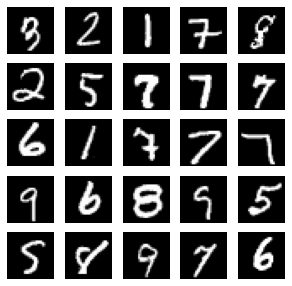

In [9]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')


## Classification Model
The classification model being used is a multilayer perceptron (MLP). A perceptron is a single neuron model that was a precursor to larger neural networks. The perceptron is built to be a simplified model of a human neuron. It takes some sort of input combined with weights, performs a calculation on the input and weights, and if the result is above a specific threshold the neuron is "fired" or triggered. When a perceptron "fires" it simply means that it is ouputing a value of 1. 

### Neuron Weights
In linear regression, there are coefficients that are applied to the variables that effect the overall output of the regression model. This is very similar to what happens in a perceptron. The weights of a perceptron are applied to the input. There is typically one weight value per input. For example, if there are three inputs into a perceptron, then there are three weights. One for each input value. Typically the weights are initialized to small random values. There are more complex weight initialization techniques that can be used, however, in this example the small random weights approach is being applied. As the weights increase in size, the perceptron becomes more fragile. A large weight value can have a lot of power in determining the output of the perceptron. Therefore, it is important to choose the right starting weight and update the weights throughout the training process with a proper algorithm. 

### Activiation Functions
As mentioned in the brief description of perceptrons above, the weights are applied to the input and passed through a mathematical function to get a single output. This mathematical function is called the activation function. The activation function is a simple mapping of summed weighted input to the output of the perceptron or neuron. This is called the activation function because it governs the threshold at which a perceptron is considered active, and it determines the strength of its output. 

## Networks of Perceptrons
These individual perceptrons can be arranged into very complex networks to produce very accurate prediction models for a wide variety of scenarios and data. A row of perceptrons is called a layer. Networks are typically made up of multiple layers of perceptrons. There are typically three different layers in a MLP, the visible layer (input layer), hidden layer, and output layer.

### Visible Layer
The visible layer is the first layer in the network, and it is responsible for taking input from the dataset and passing it to the next layer in the neural network. 

### Hidden Layer
The hidden layers are the layers between the visible layer and the output layer. They are called the hidden layers because they are not directly exposed to the input or the output of the network. In modern neural networks, the hidden layer is comprised of many hidden layers. The hidden layers can become very complex being comprised of different types of perceptrons all using different types of activation functions and thresholds that govern the output. The hidden layers pass data to the final layer which is known as the output layer. 

### Output Layer
The final hidden layer in the neural network is called the output layer. The output layer is responsible for outputting the a single value or an array of values that correspond the the format required by the problem. There can be many different types of activiation functions used in the output layer, and the function that is used is constrained by the type of problem being solved. For example, a binary classification problem could have a single neuron in the output layer that uses a sigmoid function to convert its input to a 1 or 0, but a multi-class classification problem could use multiple neurons in the output layer (one for each class). Each one of the neurons could contain a different activiation function if necessary. 



### Train the Model
The model will begin to be created using tensorflow in the below code blocks. First the data will be loaded into training variables, one list will hold the images and one will hold the labels for the image in the corresponding index. 

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [12]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [14]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
  
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

#### Normalize the Input
In order to ensure that all calculations being performed are resulting in output that is all on the same scale, the input values are resized and the normalized to be values between 0 and 1. Each pixel in every image can contain a value between 0 and 255. 0 represents a white pixel and 255 represents a black pixel. All of the values in between 0 and 255 are various shades of grey. By dividing each of these pixel values by 255, the input is normalized to be between the values of 0 and 1. 

In [15]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [16]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45


### Creating the Layers
The model being created is originally being created with only three hidden layers. The activation function that is being used for each of the perceptrons in these hidden layers is called the rectified linear unit or ReLU.

#### Rectified Linear Units (ReLU)
The ReLU is a short piecewise linear function that will output the input directly if it is positive, otherwise, it will output a zero. This activation has become a default for many neural networks because it is often much easier to train and achieves better performanc than other activation functions. A ReLU function can be defined using a very simple if statement:
if x > 0:
    return x
else:
    return 0
The graph for the ReLU activation function can be seen below. 


![title](ReLU.png)

In [29]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               157352192 
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                

### Loss and Cost Functions
When training machine learning models or neural networks, there should always be some sort of performance evaluation that compares the predicted values with the ground truth values. This function that compares these values and determines the performance is called the loss function. A loss function is calculated for each traning example. In the context of this problem, a loss function is calculated after each image is passed through the neural network. Its sole job is to distill aspects of the model down into a single number in such a way that improvements in that number are a sign of a better model. A cost function calculates the average performance of the model. It looks at the output from all the loss functions and produces an average performance metric for the model. There are many different types of loss functions that can be implemented, however in this example categorical cross-entropy is being used. 

#### Categorical Cross-Entropy
Categorical cross-entropy is one of the most commonly used loss functions in multi-class classification problems. In order to utilize this function the categories need to be one-hot encoded. One-hot encoding is the process of converting categorical data into numerical data that can be used by a machine learning model. The loss needs to be calculated for each class lable per observation and the results should then be summed. 

$$ H_q(q) = -\sum_{c=1}^{C} q(y_c) \times log(p(y_c)) $$

This output function essentially outputs a probability value over the *C* classes for each image. 

### Optimization
Once a loss function is determines, the goal is to minimize the loss function so that the model is as accurate as possible when making its predictions. There are many optimization algorithms that can be chosen to assist with minimizing the loss of the model. Some examples of optimizations that can be chosen are stochastic gradient descent (SGD), adaptive moments (Adam), and root mean squared (RMSprop). All of these methods are variations on the gradient descent model. 

#### Gradient Descent 
Gradient descent is an optimization algorithm thats base on a convex function and tweaks its parameters iteratively to minimize a given function to its local minimum. The initial parameters are defined, and then gradient descent uses calculus to iteratively adjust the values to they minimize the given cost-function. Gradient simply means the change in all weights with regard to the change in error. It is essentially a slope function. The higher the gradient, the steeper the slope, and the faster the model can learn. A gradient is the partial derivative with respect to its inputs. 

#### Adam
Adaptive Moment Estimation (Adam) is another method that computes the adaptive learning rates for each parameter. Adam combines two stochastic gradient approaches, Adaptive Gradients and Root Mean Squared propagation. Instead of using the entire data set to calculate the actual gradient, Adam uses randomly selected data subsets to create a stochastic approximation. 

In [18]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4296 - accuracy: 0.8682
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1971 - accuracy: 0.9417
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1538 - accuracy: 0.9538
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1325 - accuracy: 0.9598
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1123 - accuracy: 0.9663
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1031 - accuracy: 0.9679
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9706
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9736
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9747
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9748

In [19]:
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))



Test accuracy: 98.3%


## Conclusion
The overall model summary and the summary of each epoch can be seen in the tables printed above. The total number of parameters used was 157,418,498. This is a sustantial amount considering the small number of categories that are being classified (10). The overall accuracy of the model is 98.3%. This is roughly the same accuracy as the training set. There is a possibility that there is some over fitting happening with the data, however this would have to be explored deeper to determine if this is in fact the case. A total of 20 epochs was run on the model. There diminishing returns beginning to appear when using more than 20 epochs to train the model. As mentioned, the goal of the loss function was to minimize the loss at each epoch in the training phase. Looking out the summary of each epoch, the loss can be seen decreasing as the epoch number increases. The accuracy can also be seen increasing as the loss value decreases. This is a very basic example of using a multilayer perceptron to classifiy image data. However, these same strategies can be applied to build much more complex networks and data. 

# References

Brownlee, J. (2019, October 22). Loss and Loss Functions for Training Deep Learning Neural Networks. Machine Learning Mastery. https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

Brownlee, J. (2020a, June 30). Why One-Hot Encode Data in Machine Learning? Machine Learning Mastery. https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

Brownlee, J. (2020b, August 2). A Gentle Introduction to k-fold Cross-Validation. Machine Learning Mastery. https://machinelearningmastery.com/k-fold-cross-validation/

Brownlee, J. (2020c, August 15). Crash Course On Multi-Layer Perceptron Neural Networks. Machine Learning Mastery. https://machinelearningmastery.com/neural-networks-crash-course/

Donges, N. (2021, August 1). Gradient Descent: An Introduction to 1 of Machine Learning’s Most Popular Algorithms. Built In. https://builtin.com/data-science/gradient-descent

Haule, H. (2020, October 28). Understanding Error Backpropagation - Towards Data Science. Medium. https://towardsdatascience.com/error-backpropagation-5394d33ff49b

Mujtaba, H. (2020, December 22). What is Rectified Linear Unit (ReLU)? | Introduction to ReLU Activation Function. GreatLearning Blog: Free Resources What Matters to Shape Your Career! https://www.mygreatlearning.com/blog/relu-activation-function/

Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names. (2018, May 23). Gombru. https://gombru.github.io/2018/05/23/cross_entropy_loss/

Varshney, P. (2021, May 26). Understanding Loss Functions the Smart Way - Towards Data Science. Medium. https://towardsdatascience.com/understanding-loss-functions-the-smart-way-904266e9393

Zhang, J. (2020, January 21). Optimisation Algorithm — Adaptive Moment Estimation(Adam). Medium. https://towardsdatascience.com/optimisation-algorithm-adaptive-moment-estimation-adam-92144d75e232